In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Start
repo - https://github.com/peteryuX/retinaface-tf2

Dataset - http://shuoyang1213.me/WIDERFACE/

Training dataset download link - https://drive.google.com/file/d/15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M/view

Validation dataset download link - https://drive.google.com/file/d/1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q/view

RetinaFace official annotations - http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip

In [2]:
import os
import cv2
import json
import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from google_drive_downloader import GoogleDriveDownloader as gdd

#Download Dataset and annotations

In [ ]:
# !mkdir data

In [ ]:
# #training images
# gdd.download_file_from_google_drive(file_id='15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M',
#                                     dest_path='/content/data/widertrain.zip',
#                                     unzip=True)

Unzipping...Done.


In [ ]:
# #validation images
# gdd.download_file_from_google_drive(file_id='1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q',
#                                     dest_path='/content/data/widerval.zip',
#                                     unzip=True)

Unzipping...Done.


In [ ]:
# !mkdir labels

In [ ]:
# #ground truth labels
# gdd.download_file_from_google_drive(file_id='1vgCABX1JI3NGBzsHxwBXlmRjaLV3NIsG',
#                                     dest_path='/content/labels/widergt.zip',
#                                     unzip=True)

Unzipping...Done.


In [ ]:
# !cp /content/labels/train/label.txt /content/data/WIDER_train/

In [ ]:
# !cp /content/labels/val/label.txt /content/data/WIDER_val/

From official site as well http://shuoyang1213.me/WIDERFACE/

In [ ]:
# !wget http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip

In [ ]:
#!unzip /content/wider_face_split.zip

In [ ]:
# !cp /content/wider_face_split/wider_face_train_bbx_gt.txt /content/data/WIDER_train
# !cp /content/wider_face_split/wider_face_val_bbx_gt.txt /content/data/WIDER_val

cp: cannot stat '/content/wider_face_split/wider_face_train_bbx_gt.txt': No such file or directory
cp: cannot stat '/content/wider_face_split/wider_face_val_bbx_gt.txt': No such file or directory


In [ ]:
# !mkdir /content/data/widerface
# !mkdir /content/data/widerface/train
# !mkdir /content/data/widerface/val

# Checking Dataset

In [ ]:
# train_images_folder = '/content/data/widerface/train/images'
# len(os.listdir(train_images_folder))

61

In [ ]:
# len(os.listdir(os.path.join(
#     train_images_folder, 
#     os.listdir(train_images_folder)[0])))

178

# Reading labels dataset

In [ ]:
# with open('/content/data/widerface/train/label.txt') as f:
#     lines = f.readlines()

In [ ]:
# lines[:4]

['# 0--Parade/0_Parade_marchingband_1_849.jpg\n',
 '449 330 122 149 488.906 373.643 0.0 542.089 376.442 0.0 515.031 412.83 0.0 485.174 425.893 0.0 538.357 431.491 0.0 0.82\n',
 '# 0--Parade/0_Parade_Parade_0_904.jpg\n',
 '361 98 263 339 424.143 251.656 0.0 547.134 232.571 0.0 494.121 325.875 0.0 453.83 368.286 0.0 561.978 342.839 0.0 0.89\n']

In [ ]:
# for i,line in enumerate(lines):
#     if '#' not in line:
#         l = len(line.split())
#         if l!=20:
#             print(i,l)

# Testing img and bounding boxes

In [ ]:
# len(samples)

In [ ]:
# print(samples[4][0])
# for i in samples[4][1]:
#     print(i)

In [ ]:
# im = cv2.imread(samples[4][0])
# im.shape

In [ ]:
# plt.imshow(im[:,:,::-1])

In [ ]:
# samples[4][1][0][:4]

In [ ]:
# for s in samples[4][1]:
#     x,y,w,h = s[:4]
#     cv2.rectangle(im, (int(x), int(y)),(int(x+w), int(y+h)), (0,255,0), 4)

In [ ]:
# plt.imshow(im[:,:,::-1])

# Preparing tfrecord

In [ ]:
# import os
# import tqdm
# import random
# import tensorflow as tf
# import numpy as np


# def _bytes_feature(value):
#     """Returns a bytes_list from a string / byte."""
#     if isinstance(value, type(tf.constant(0))):
#         value = value.numpy()
#     return tf.train.Feature(bytes_list=tf.train.BytesList(value=value))


# def _float_feature(value):
#     """Returns a float_list from a float / double."""
#     return tf.train.Feature(float_list=tf.train.FloatList(value=value))


# def _int64_feature(value):
#     """Returns an int64_list from a bool / enum / int / uint."""
#     return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

In [ ]:
# def make_example(img_name, img_path, target, is_binary):
#     # Create a dictionary with features that may be relevant.
#     feature = {'image/img_name': _bytes_feature([img_name]),
#                'image/object/bbox/xmin': _float_feature(target[:, 0]),
#                'image/object/bbox/ymin': _float_feature(target[:, 1]),
#                'image/object/bbox/xmax': _float_feature(target[:, 2]),
#                'image/object/bbox/ymax': _float_feature(target[:, 3]),
#                'image/object/landmark/valid': _float_feature(target[:, 4])}
#     if is_binary:
#         img_str = open(img_path, 'rb').read()
#         feature['image/encoded'] = _bytes_feature([img_str])
#     else:
#         feature['image/img_path'] = _bytes_feature([img_path])

#     return tf.train.Example(features=tf.train.Features(feature=feature))

In [ ]:
# def load_info(txt_path):
#     """load info from txt"""
#     img_paths = []
#     words = []

#     f = open(txt_path, 'r')
#     lines = f.readlines()
#     isFirst = True
#     labels = []
#     for line in lines:
#         line = line.rstrip()
#         if line.startswith('#'):
#             if isFirst is True:
#                 isFirst = False
#             else:
#                 labels_copy = labels.copy()
#                 words.append(labels_copy)
#                 labels.clear()
#             path = line[2:]
#             path = txt_path.replace('label.txt', 'images/') + path
#             img_paths.append(path)
#         else:
#             line = line.split(' ')
#             label = [float(x) for x in line]
#             labels.append(label)

#     words.append(labels)
#     return img_paths, words

In [ ]:
# def get_target(labels):
#     annotations = np.zeros((0, 5))
#     if len(labels) == 0:
#         return annotations
#     for idx, label in enumerate(labels):
#         annotation = np.zeros((1, 5))
#         # bbox
#         annotation[0, 0] = label[0]  # x1
#         annotation[0, 1] = label[1]  # y1
#         annotation[0, 2] = label[0] + label[2]  # x2
#         annotation[0, 3] = label[1] + label[3]  # y2

#         if (label[4] < 0):
#             annotation[0, 4] = -1  # w/o landmark
#         else:
#             annotation[0, 4] = 1

#         annotations = np.append(annotations, annotation, axis=0)
#     target = np.array(annotations)

#     return target


In [ ]:
# img_paths, words = load_info(os.path.join(dataset_path, 'label.txt'))
# samples = list(zip(img_paths, words))
# #random.shuffle(samples)

In [ ]:
# print(len(samples))

# print(len(samples[0]))
# print(samples[0][0])
# print(len(samples[0][1]))

12880
2
./data/widerface/train/images/0--Parade/0_Parade_marchingband_1_849.jpg
1


In [ ]:
# dataset_path = './data/widerface/train'
# output_path = '/content/drive/MyDrive/RetinaFace/widerface_train_bin_onlybbox.tfrecord'
# is_binary = True

In [ ]:
# with tf.io.TFRecordWriter(output_path) as writer:
#     for img_path, word in tqdm.tqdm(samples):
#         target = get_target(word)
#         img_name = os.path.basename(img_path).replace('.jpg', '')

#         tf_example = make_example(img_name=str.encode(img_name),
#                                   img_path=str.encode(img_path),
#                                   target=target,
#                                   is_binary=is_binary)

#         writer.write(tf_example.SerializeToString())



100%|██████████| 12880/12880 [00:17<00:00, 722.46it/s]


# Configuration

In [3]:
cfg = {
'batch_size': 1,
'input_size': 640,
'backbone_type': 'MobileNetV2',  # 'ResNet50', 'MobileNetV2'
'sub_name': 'retinaface_mbv2',

# training dataset
'dataset_path': '/content/drive/MyDrive/RetinaFace/widerface_train_bin_onlybbox.tfrecord',
'dataset_len': 12880,  # number of training samples
'using_bin': True,            #using binary or not
'using_flip': False,
'using_distort': False,

# testing dataset
'testing_dataset_path': './data/widerface/val',

# network
'out_channel': 64,

# anchor setting
'min_sizes': [[16, 32], [64, 128], [256, 512]],
'steps': [8, 16, 32],
'match_thresh': 0.45,
'ignore_thresh': 0.3,
'variances': [0.1, 0.2],
'clip': False,

# training setting
'epoch': 1,
'init_lr': float(1e-2),
'lr_decay_epoch': [50, 68],
'lr_rate': 0.1,
'warmup_epoch': 5,
'min_lr': float(1e-3),

'weights_decay': float(5e-4),
'momentum': 0.9,

'pretrain': True,

'save_steps': 1000
}

# Datasets

## Priors

In [4]:
import math
import tensorflow as tf
import numpy as np
from itertools import product as product


###############################################################################
#   Tensorflow / Numpy Priors                                                 #
###############################################################################
def prior_box(image_sizes, min_sizes, steps, clip=False):
    """prior box"""
    feature_maps = [
        [math.ceil(image_sizes[0] / step), math.ceil(image_sizes[1] / step)]
        for step in steps]

    anchors = []
    for k, f in enumerate(feature_maps):
        for i, j in product(range(f[0]), range(f[1])):
            for min_size in min_sizes[k]:
                s_kx = min_size / image_sizes[1]
                s_ky = min_size / image_sizes[0]
                cx = (j + 0.5) * steps[k] / image_sizes[1]
                cy = (i + 0.5) * steps[k] / image_sizes[0]
                anchors += [cx, cy, s_kx, s_ky]

    output = np.asarray(anchors).reshape([-1, 4])

    if clip:
        output = np.clip(output, 0, 1)

    return output


def prior_box_tf(image_sizes, min_sizes, steps, clip=False):
    """prior box"""
    image_sizes = tf.cast(tf.convert_to_tensor(image_sizes), tf.float32)
    feature_maps = tf.math.ceil(
        tf.reshape(image_sizes, [1, 2]) /
        tf.reshape(tf.cast(steps, tf.float32), [-1, 1]))

    anchors = []
    for k in range(len(min_sizes)):
        grid_x, grid_y = _meshgrid_tf(tf.range(feature_maps[k][1]),
                                      tf.range(feature_maps[k][0]))
        cx = (grid_x + 0.5) * steps[k] / image_sizes[1]
        cy = (grid_y + 0.5) * steps[k] / image_sizes[0]
        cxcy = tf.stack([cx, cy], axis=-1)
        cxcy = tf.reshape(cxcy, [-1, 2])
        cxcy = tf.repeat(cxcy, repeats=tf.shape(min_sizes[k])[0], axis=0)

        sx = min_sizes[k] / image_sizes[1]
        sy = min_sizes[k] / image_sizes[0]
        sxsy = tf.stack([sx, sy], 1)
        sxsy = tf.repeat(sxsy[tf.newaxis],
                         repeats=tf.shape(grid_x)[0] * tf.shape(grid_x)[1],
                         axis=0)
        sxsy = tf.reshape(sxsy, [-1, 2])

        anchors.append(tf.concat([cxcy, sxsy], 1))

    output = tf.concat(anchors, axis=0)

    if clip:
        output = tf.clip_by_value(output, 0, 1)

    return output

def _meshgrid_tf(x, y):
    """ workaround solution of the tf.meshgrid() issue:
        https://github.com/tensorflow/tensorflow/issues/34470"""
    grid_shape = [tf.shape(y)[0], tf.shape(x)[0]]
    grid_x = tf.broadcast_to(tf.reshape(x, [1, -1]), grid_shape)
    grid_y = tf.broadcast_to(tf.reshape(y, [-1, 1]), grid_shape)
    return grid_x, grid_y


## Encoding

In [5]:
def _encode_bbox(matched, priors, variances):
    """Encode the variances from the priorbox layers into the ground truth
    boxes we have matched (based on jaccard overlap) with the prior boxes.
    Args:
        matched: (tensor) Coords of ground truth for each prior in point-form
            Shape: [num_priors, 4].
        priors: (tensor) Prior boxes in center-offset form
            Shape: [num_priors,4].
        variances: (list[float]) Variances of priorboxes
    Return:
        encoded boxes (tensor), Shape: [num_priors, 4]
    """

    # dist b/t match center and prior's center
    g_cxcy = (matched[:, :2] + matched[:, 2:]) / 2 - priors[:, :2]
    # encode variance
    g_cxcy /= (variances[0] * priors[:, 2:])
    # match wh / prior wh
    g_wh = (matched[:, 2:] - matched[:, :2]) / priors[:, 2:]
    g_wh = tf.math.log(g_wh) / variances[1]
    # return target for smooth_l1_loss
    return tf.concat([g_cxcy, g_wh], 1)  # [num_priors,4]


def _encode_landm(matched, priors, variances):
    """Encode the variances from the priorbox layers into the ground truth
    boxes we have matched (based on jaccard overlap) with the prior boxes.
    Args:
        matched: (tensor) Coords of ground truth for each prior in point-form
            Shape: [num_priors, 10].
        priors: (tensor) Prior boxes in center-offset form
            Shape: [num_priors,4].
        variances: (list[float]) Variances of priorboxes
    Return:
        encoded landm (tensor), Shape: [num_priors, 10]
    """

    # dist b/t match center and prior's center
    matched = tf.reshape(matched, [tf.shape(matched)[0], 5, 2])
    priors = tf.broadcast_to(
        tf.expand_dims(priors, 1), [tf.shape(matched)[0], 5, 4])
    g_cxcy = matched[:, :, :2] - priors[:, :, :2]
    # encode variance
    g_cxcy /= (variances[0] * priors[:, :, 2:])
    # g_cxcy /= priors[:, :, 2:]
    g_cxcy = tf.reshape(g_cxcy, [tf.shape(g_cxcy)[0], -1])
    # return target for smooth_l1_loss
    return g_cxcy


def _point_form(boxes):
    """ Convert prior_boxes to (xmin, ymin, xmax, ymax)
    representation for comparison to point form ground truth data.
    Args:
        boxes: (tensor) center-size default boxes from priorbox layers.
    Return:
        boxes: (tensor) Converted xmin, ymin, xmax, ymax form of boxes.
    """
    return tf.concat((boxes[:, :2] - boxes[:, 2:] / 2,
                      boxes[:, :2] + boxes[:, 2:] / 2), axis=1)


def _intersect(box_a, box_b):
    """ We resize both tensors to [A,B,2]:
    [A,2] -> [A,1,2] -> [A,B,2]
    [B,2] -> [1,B,2] -> [A,B,2]
    Then we compute the area of intersect between box_a and box_b.
    Args:
      box_a: (tensor) bounding boxes, Shape: [A,4].
      box_b: (tensor) bounding boxes, Shape: [B,4].
    Return:
      (tensor) intersection area, Shape: [A,B].
    """
    A = tf.shape(box_a)[0]
    B = tf.shape(box_b)[0]
    max_xy = tf.minimum(
        tf.broadcast_to(tf.expand_dims(box_a[:, 2:], 1), [A, B, 2]),
        tf.broadcast_to(tf.expand_dims(box_b[:, 2:], 0), [A, B, 2]))
    min_xy = tf.maximum(
        tf.broadcast_to(tf.expand_dims(box_a[:, :2], 1), [A, B, 2]),
        tf.broadcast_to(tf.expand_dims(box_b[:, :2], 0), [A, B, 2]))
    inter = tf.maximum((max_xy - min_xy), tf.zeros_like(max_xy - min_xy))
    return inter[:, :, 0] * inter[:, :, 1]


def _jaccard(box_a, box_b):
    """Compute the jaccard overlap of two sets of boxes.  The jaccard overlap
    is simply the intersection over union of two boxes.  Here we operate on
    ground truth boxes and default boxes.
    E.g.:
        A ∩ B / A ∪ B = A ∩ B / (area(A) + area(B) - A ∩ B)
    Args:
        box_a: (tensor) Ground truth bounding boxes, Shape: [num_objects,4]
        box_b: (tensor) Prior boxes from priorbox layers, Shape: [num_priors,4]
    Return:
        jaccard overlap: (tensor) Shape: [box_a.size(0), box_b.size(0)]
    """
    inter = _intersect(box_a, box_b)
    area_a = tf.broadcast_to(
        tf.expand_dims(
            (box_a[:, 2] - box_a[:, 0]) * (box_a[:, 3] - box_a[:, 1]), 1),
        tf.shape(inter))  # [A,B]
    area_b = tf.broadcast_to(
        tf.expand_dims(
            (box_b[:, 2] - box_b[:, 0]) * (box_b[:, 3] - box_b[:, 1]), 0),
        tf.shape(inter))  # [A,B]
    union = area_a + area_b - inter
    return inter / union  # [A,B]




In [6]:
###############################################################################
#   Tensorflow Encoding                                                       #
###############################################################################
def encode_tf(labels, priors, match_thresh, ignore_thresh,
              variances=[0.1, 0.2]):
    """tensorflow encoding"""
    assert ignore_thresh <= match_thresh
    priors = tf.cast(priors, tf.float32)
    bbox = labels[:, :4]
    #landm = labels[:, 4:-1]
    landm = tf.concat([labels[:, :],labels[:, :]], axis=1)         #dummy value
    landm_valid = labels[:, -1]  # 1: with landm, 0: w/o landm.

    # jaccard index
    overlaps = _jaccard(bbox, _point_form(priors))

    # (Bipartite Matching)
    # [num_objects] best prior for each ground truth
    best_prior_overlap, best_prior_idx = tf.math.top_k(overlaps, k=1)
    best_prior_overlap = best_prior_overlap[:, 0]
    best_prior_idx = best_prior_idx[:, 0]

    # [num_priors] best ground truth for each prior
    overlaps_t = tf.transpose(overlaps)
    best_truth_overlap, best_truth_idx = tf.math.top_k(overlaps_t, k=1)
    best_truth_overlap = best_truth_overlap[:, 0]
    best_truth_idx = best_truth_idx[:, 0]

    # ensure best prior
    def _loop_body(i, bt_idx, bt_overlap):
        bp_mask = tf.one_hot(best_prior_idx[i], tf.shape(bt_idx)[0])
        bp_mask_int = tf.cast(bp_mask, tf.int32)
        new_bt_idx = bt_idx * (1 - bp_mask_int) + bp_mask_int * i
        bp_mask_float = tf.cast(bp_mask, tf.float32)
        new_bt_overlap = bt_overlap * (1 - bp_mask_float) + bp_mask_float * 2
        return tf.cond(best_prior_overlap[i] > match_thresh,
                       lambda: (i + 1, new_bt_idx, new_bt_overlap),
                       lambda: (i + 1, bt_idx, bt_overlap))
    _, best_truth_idx, best_truth_overlap = tf.while_loop(
        lambda i, bt_idx, bt_overlap: tf.less(i, tf.shape(best_prior_idx)[0]),
        _loop_body, [tf.constant(0), best_truth_idx, best_truth_overlap])

    matches_bbox = tf.gather(bbox, best_truth_idx)  # [num_priors, 4]
    matches_landm = tf.gather(landm, best_truth_idx)  # [num_priors, 10]
    matches_landm_v = tf.gather(landm_valid, best_truth_idx)  # [num_priors]

    loc_t = _encode_bbox(matches_bbox, priors, variances)
    landm_t = _encode_landm(matches_landm, priors, variances)
    landm_valid_t = tf.cast(matches_landm_v > 0, tf.float32)
    conf_t = tf.cast(best_truth_overlap > match_thresh, tf.float32)
    conf_t = tf.where(
        tf.logical_and(best_truth_overlap < match_thresh,
                       best_truth_overlap > ignore_thresh),
        tf.ones_like(conf_t) * -1, conf_t)    # 1: pos, 0: neg, -1: ignore

    return tf.concat([loc_t,
                      #landm_t,
                      landm_valid_t[..., tf.newaxis],
                      conf_t[..., tf.newaxis]], 
                     axis=1)

## Reading tfrecord

In [7]:
tf.random.uniform([], 0, 5, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [8]:
def _resize(img, labels, img_dim):                          #img_dim - 640
    w_f = tf.cast(tf.shape(img)[1], tf.float32)
    h_f = tf.cast(tf.shape(img)[0], tf.float32)

    #bboxes
    locs = tf.stack([labels[:, 0] / w_f,  labels[:, 1] / h_f,
                     labels[:, 2] / w_f,  labels[:, 3] / h_f,],
                     axis=1)
    
    locs = tf.clip_by_value(locs, 0, 1)
    labels = tf.concat([locs, labels[:, 4][:, tf.newaxis]], axis=1)

    #random number from [0,1,2,3,4]
    resize_case = tf.random.uniform([], 0, 5, dtype=tf.int32)

    def resize(method):
        def _resize():
            return tf.image.resize(
                img, [img_dim, img_dim], method=method, antialias=True)
        return _resize

    img = tf.case([(tf.equal(resize_case, 0), resize('bicubic')),
                   (tf.equal(resize_case, 1), resize('area')),
                   (tf.equal(resize_case, 2), resize('nearest')),
                   (tf.equal(resize_case, 3), resize('lanczos3'))],
                  default=resize('bilinear'))

    return img, labels

In [9]:
def _pad_to_square(img):
    height = tf.shape(img)[0]
    width = tf.shape(img)[1]

    def pad_h():
        img_pad_h = tf.ones([width - height, width, 3]) * \
            tf.reduce_mean(img, axis=[0, 1], keepdims=True)
        return tf.concat([img, img_pad_h], axis=0)

    def pad_w():
        img_pad_w = tf.ones([height, height - width, 3]) * \
            tf.reduce_mean(img, axis=[0, 1], keepdims=True)
        return tf.concat([img, img_pad_w], axis=1)

    img = tf.case([(tf.greater(height, width), pad_w),
                   (tf.less(height, width), pad_h)], default=lambda: img)

    return img

In [10]:
def _parse_tfrecord(img_dim, using_bin, using_flip, using_distort,
                    using_encoding, priors, match_thresh, ignore_thresh,
                    variances):
    def parse_tfrecord(tfrecord):
        features = {
            'image/img_name': tf.io.FixedLenFeature([], tf.string),
            'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
            'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
            'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
            'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
            'image/object/landmark/valid': tf.io.VarLenFeature(tf.float32)}
        if using_bin:
            features['image/encoded'] = tf.io.FixedLenFeature([], tf.string)
            x = tf.io.parse_single_example(tfrecord, features)
            img = tf.image.decode_jpeg(x['image/encoded'], channels=3)
        else:
            features['image/img_path'] = tf.io.FixedLenFeature([], tf.string)
            x = tf.io.parse_single_example(tfrecord, features)
            image_encoded = tf.io.read_file(x['image/img_path'])
            img = tf.image.decode_jpeg(image_encoded, channels=3)

        labels = tf.stack(
            [tf.sparse.to_dense(x['image/object/bbox/xmin']),
             tf.sparse.to_dense(x['image/object/bbox/ymin']),
             tf.sparse.to_dense(x['image/object/bbox/xmax']),
             tf.sparse.to_dense(x['image/object/bbox/ymax']),
             tf.sparse.to_dense(x['image/object/landmark/valid'])], axis=1)

        img, labels = _transform_data(
            img_dim, using_flip, using_distort, using_encoding, priors,
            match_thresh, ignore_thresh, variances)(img, labels)

        return img, labels
    return parse_tfrecord

In [11]:
def _transform_data(img_dim, using_flip, using_distort, using_encoding, priors,
                    match_thresh, ignore_thresh, variances):
    def transform_data(img, labels):
        img = tf.cast(img, tf.float32)

        # randomly crop
        #img, labels = _crop(img, labels)

        # padding to square
        img = _pad_to_square(img)

        # resize (640,640)
        img, labels = _resize(img, labels, img_dim)

        # # randomly left-right flip
        # if using_flip:
        #     img, labels = _flip(img, labels)

        # # distort
        # if using_distort:
        #     img = _distort(img)

        # encode labels to feature targets
        if using_encoding:
            labels = encode_tf(labels=labels, priors=priors,
                               match_thresh=match_thresh,
                               ignore_thresh=ignore_thresh,
                               variances=variances)

        return img, labels
    return transform_data

In [12]:
def load_tfrecord_dataset(tfrecord_name, batch_size, img_dim,
                          using_bin=True, using_flip=False, using_distort=False,
                          using_encoding=True, priors=None, match_thresh=0.45,
                          ignore_thresh=0.3, variances=[0.1, 0.2],
                          shuffle=True, buffer_size=10240):
    """load dataset from tfrecord"""
    if not using_encoding:
        assert batch_size == 1  # dynamic data len when using_encoding
    else:
        assert priors is not None

    raw_dataset = tf.data.TFRecordDataset(tfrecord_name)
    raw_dataset = raw_dataset.repeat()
    if shuffle:
        raw_dataset = raw_dataset.shuffle(buffer_size=buffer_size)
    dataset = raw_dataset.map(
        _parse_tfrecord(img_dim, using_bin, using_flip, using_distort,
                        using_encoding, priors, match_thresh, ignore_thresh,
                        variances),
        num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(
        buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [13]:
def load_dataset(cfg, priors, shuffle=True, buffer_size=10240):
    """load dataset"""
    print("\n loading dataset from {} \n".format(cfg['dataset_path']))

    dataset = load_tfrecord_dataset(
        tfrecord_name=cfg['dataset_path'],
        batch_size=cfg['batch_size'],
        img_dim=cfg['input_size'],
        using_bin=cfg['using_bin'],
        using_flip=cfg['using_flip'],
        using_distort=cfg['using_distort'],
        using_encoding=True,
        priors=priors,
        match_thresh=cfg['match_thresh'],
        ignore_thresh=cfg['ignore_thresh'],
        variances=cfg['variances'],
        shuffle=shuffle,
        buffer_size=buffer_size)
    return dataset

In [14]:
cfg

{'backbone_type': 'MobileNetV2',
 'batch_size': 1,
 'clip': False,
 'dataset_len': 12880,
 'dataset_path': '/content/drive/MyDrive/RetinaFace/widerface_train_bin_onlybbox.tfrecord',
 'epoch': 1,
 'ignore_thresh': 0.3,
 'init_lr': 0.01,
 'input_size': 640,
 'lr_decay_epoch': [50, 68],
 'lr_rate': 0.1,
 'match_thresh': 0.45,
 'min_lr': 0.001,
 'min_sizes': [[16, 32], [64, 128], [256, 512]],
 'momentum': 0.9,
 'out_channel': 64,
 'pretrain': True,
 'save_steps': 1000,
 'steps': [8, 16, 32],
 'sub_name': 'retinaface_mbv2',
 'testing_dataset_path': './data/widerface/val',
 'using_bin': True,
 'using_distort': False,
 'using_flip': False,
 'variances': [0.1, 0.2],
 'warmup_epoch': 5,
 'weights_decay': 0.0005}

In [15]:
# define prior box
priors = prior_box((cfg['input_size'], cfg['input_size']),
                    cfg['min_sizes'],  cfg['steps'], cfg['clip'])

priors

array([[0.00625, 0.00625, 0.025  , 0.025  ],
       [0.00625, 0.00625, 0.05   , 0.05   ],
       [0.01875, 0.00625, 0.025  , 0.025  ],
       ...,
       [0.925  , 0.975  , 0.8    , 0.8    ],
       [0.975  , 0.975  , 0.4    , 0.4    ],
       [0.975  , 0.975  , 0.8    , 0.8    ]])

In [16]:
priors.shape

(16800, 4)

In [17]:
train_dataset = load_dataset(cfg, priors, shuffle=False)


 loading dataset from /content/drive/MyDrive/RetinaFace/widerface_train_bin_onlybbox.tfrecord 



In [18]:
train_dataset

<PrefetchDataset shapes: ((1, 640, 640, 3), (1, 16800, 6)), types: (tf.float32, tf.float32)>

In [20]:
train_dataset.take(1)

<TakeDataset shapes: ((1, 640, 640, 3), (1, 16800, 6)), types: (tf.float32, tf.float32)>

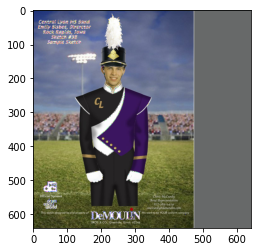

In [21]:
for i,j in train_dataset.take(1):
  x = i.numpy()[0,:,:,:]
  y = j.numpy()[0]

plt.imshow(x.astype(np.uint8))
plt.show()

In [22]:
x.shape, y.shape

((640, 640, 3), (16800, 6))

In [ ]:
# data = x.copy()

# data.max()

270.38324

In [ ]:
# data

In [ ]:
# # data = data /270.38324         # normalize the data to 0 - 1
# data = 255 * data # Now scale by 255

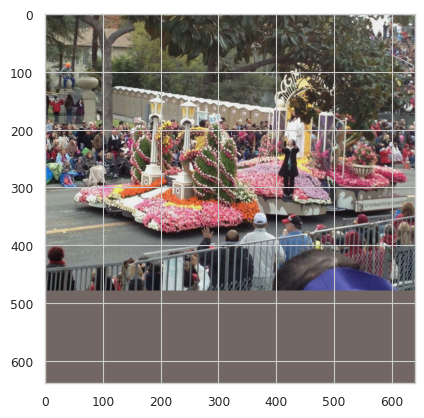

In [ ]:
# plt.imshow(data.astype(np.uint8))
# plt.show()

# Post processing model output - functions

## Dencoding

In [38]:
###############################################################################
#   Tensorflow Decoding                                                       #
###############################################################################
def decode_tf(labels, priors, variances=[0.1, 0.2]):
    """tensorflow decoding"""
    bbox = _decode_bbox(labels[:, :4], priors, variances)
    
    #dummy data for landm
    #landm = tf.concat([labels[:, :4],labels[:, :4]], axis=1) 
    #landm = _decode_landm(landm, priors, variances)
    #

    landm_valid = labels[:, 4][:, tf.newaxis]
    conf = labels[:, 5][:, tf.newaxis]

    return tf.concat(
        [bbox, 
         #landm, 
         landm_valid, 
         conf], 
         axis=1)


def _decode_bbox(pre, priors, variances=[0.1, 0.2]):
    """Decode locations from predictions using priors to undo
    the encoding we did for offset regression at train time.
    Args:
        pre (tensor): location predictions for loc layers,
            Shape: [num_priors,4]
        priors (tensor): Prior boxes in center-offset form.
            Shape: [num_priors,4].
        variances: (list[float]) Variances of priorboxes
    Return:
        decoded bounding box predictions
    """
    centers = priors[:, :2] + pre[:, :2] * variances[0] * priors[:, 2:]
    sides = priors[:, 2:] * tf.math.exp(pre[:, 2:] * variances[1])

    return tf.concat([centers - sides / 2, centers + sides / 2], axis=1)


def _decode_landm(pre, priors, variances=[0.1, 0.2]):
    """Decode landm from predictions using priors to undo
    the encoding we did for offset regression at train time.
    Args:
        pre (tensor): landm predictions for loc layers,
            Shape: [num_priors,10]
        priors (tensor): Prior boxes in center-offset form.
            Shape: [num_priors,4].
        variances: (list[float]) Variances of priorboxes
    Return:
        decoded landm predictions
    """
    landms = tf.concat(
        [priors[:, :2] + pre[:, :2] * variances[0] * priors[:, 2:],
         priors[:, :2] + pre[:, 2:4] * variances[0] * priors[:, 2:],
         priors[:, :2] + pre[:, 4:6] * variances[0] * priors[:, 2:],
         priors[:, :2] + pre[:, 6:8] * variances[0] * priors[:, 2:],
         priors[:, :2] + pre[:, 8:10] * variances[0] * priors[:, 2:]], axis=1)
    return landms

## Utils

In [ ]:
import cv2
import yaml
import sys
import time
import numpy as np
import tensorflow as tf
from absl import logging



def load_yaml(load_path):
    """load yaml file"""
    with open(load_path, 'r') as f:
        loaded = yaml.load(f, Loader=yaml.Loader)

    return loaded


def set_memory_growth():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                logical_gpus = tf.config.experimental.list_logical_devices(
                    'GPU')
                logging.info(
                    "Detect {} Physical GPUs, {} Logical GPUs.".format(
                        len(gpus), len(logical_gpus)))
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            logging.info(e)


def load_dataset(cfg, priors, shuffle=True, buffer_size=10240):
    """load dataset"""
    logging.info("load dataset from {}".format(cfg['dataset_path']))
    dataset = load_tfrecord_dataset(
        tfrecord_name=cfg['dataset_path'],
        batch_size=cfg['batch_size'],
        img_dim=cfg['input_size'],
        using_bin=cfg['using_bin'],
        using_flip=cfg['using_flip'],
        using_distort=cfg['using_distort'],
        using_encoding=True,
        priors=priors,
        match_thresh=cfg['match_thresh'],
        ignore_thresh=cfg['ignore_thresh'],
        variances=cfg['variances'],
        shuffle=shuffle,
        buffer_size=buffer_size)
    return dataset


class ProgressBar(object):
    """A progress bar which can print the progress modified from
       https://github.com/hellock/cvbase/blob/master/cvbase/progress.py"""
    def __init__(self, task_num=0, completed=0, bar_width=25):
        self.task_num = task_num
        max_bar_width = self._get_max_bar_width()
        self.bar_width = (bar_width
                          if bar_width <= max_bar_width else max_bar_width)
        self.completed = completed
        self.first_step = completed
        self.warm_up = False

    def _get_max_bar_width(self):
        if sys.version_info > (3, 3):
            from shutil import get_terminal_size
        else:
            from backports.shutil_get_terminal_size import get_terminal_size
        terminal_width, _ = get_terminal_size()
        max_bar_width = min(int(terminal_width * 0.6), terminal_width - 50)
        if max_bar_width < 10:
            logging.info('terminal width is too small ({}), please consider '
                         'widen the terminal for better progressbar '
                         'visualization'.format(terminal_width))
            max_bar_width = 10
        return max_bar_width

    def reset(self):
        """reset"""
        self.completed = 0
        self.fps = 0

    def update(self, inf_str=''):
        """update"""
        self.completed += 1

        if not self.warm_up:
            self.start_time = time.time() - 1e-1
            self.warm_up = True

        if self.completed > self.task_num:
            self.completed = self.completed % self.task_num
            self.start_time = time.time() - 1 / self.fps
            self.first_step = self.completed - 1
            sys.stdout.write('\n')

        elapsed = time.time() - self.start_time
        self.fps = (self.completed - self.first_step) / elapsed
        percentage = self.completed / float(self.task_num)
        mark_width = int(self.bar_width * percentage)
        bar_chars = '>' * mark_width + ' ' * (self.bar_width - mark_width)
        stdout_str = '\rTraining [{}] {}/{}, {}  {:.1f} step/sec'
        sys.stdout.write(stdout_str.format(
            bar_chars, self.completed, self.task_num, inf_str, self.fps))

        sys.stdout.flush()


###############################################################################
#   Testing                                                                   #
###############################################################################
def pad_input_image(img, max_steps):
    """pad image to suitable shape"""
    img_h, img_w, _ = img.shape

    img_pad_h = 0
    if img_h % max_steps > 0:
        img_pad_h = max_steps - img_h % max_steps

    img_pad_w = 0
    if img_w % max_steps > 0:
        img_pad_w = max_steps - img_w % max_steps

    padd_val = np.mean(img, axis=(0, 1)).astype(np.uint8)
    img = cv2.copyMakeBorder(img, 0, img_pad_h, 0, img_pad_w,
                             cv2.BORDER_CONSTANT, value=padd_val.tolist())
    pad_params = (img_h, img_w, img_pad_h, img_pad_w)

    return img, pad_params


def recover_pad_output(outputs, pad_params):
    """recover the padded output effect"""
    img_h, img_w, img_pad_h, img_pad_w = pad_params
    recover_xy = np.reshape(outputs[:, :14], [-1, 7, 2]) * \
        [(img_pad_w + img_w) / img_w, (img_pad_h + img_h) / img_h]
    outputs[:, :14] = np.reshape(recover_xy, [-1, 14])

    return outputs


###############################################################################
#   Visulization                                                              #
###############################################################################
def draw_bbox_landm(img, ann, img_height, img_width):
    """draw bboxes and landmarks"""
    # bbox
    x1, y1, x2, y2 = int(ann[0] * img_width), int(ann[1] * img_height), \
                     int(ann[2] * img_width), int(ann[3] * img_height)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # confidence
    text = "{:.4f}".format(ann[15])
    cv2.putText(img, text, (int(ann[0] * img_width), int(ann[1] * img_height)),
                cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))

    # landmark
    if ann[14] > 0:
        cv2.circle(img, (int(ann[4] * img_width),
                         int(ann[5] * img_height)), 1, (255, 255, 0), 2)
        cv2.circle(img, (int(ann[6] * img_width),
                         int(ann[7] * img_height)), 1, (0, 255, 255), 2)
        cv2.circle(img, (int(ann[8] * img_width),
                         int(ann[9] * img_height)), 1, (255, 0, 0), 2)
        cv2.circle(img, (int(ann[10] * img_width),
                         int(ann[11] * img_height)), 1, (0, 100, 255), 2)
        cv2.circle(img, (int(ann[12] * img_width),
                         int(ann[13] * img_height)), 1, (255, 0, 100), 2)


def draw_anchor(img, prior, img_height, img_width):
    """draw anchors"""
    x1 = int(prior[0] * img_width - prior[2] * img_width / 2)
    y1 = int(prior[1] * img_height - prior[3] * img_height / 2)
    x2 = int(prior[0] * img_width + prior[2] * img_width / 2)
    y2 = int(prior[1] * img_height + prior[3] * img_height / 2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 1)

# understanding output - Postprocessing model output

In [69]:
for i,j in train_dataset.take(5):
  xtemp = i.numpy()[0,:,:,:]
  ytemp = j.numpy()[0]


In [70]:
xtemp.shape, ytemp.shape

((640, 640, 3), (16800, 6))

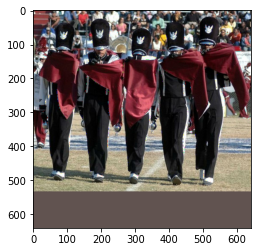

In [71]:
plt.imshow(xtemp.astype(np.uint8))
plt.show()

In [72]:
xtemp = np.expand_dims(xtemp, axis=0)
ytemp = np.expand_dims(ytemp, axis=0)

xtemp.shape, ytemp.shape

((1, 640, 640, 3), (1, 16800, 6))

In [29]:
# model_output = ytemp.copy()
# model_output.shape

(1, 16800, 6)

In [73]:
preds = ytemp.copy()
preds = preds[0]
preds.shape

(16800, 6)

In [ ]:
# #preds
# preds = tf.concat(
#     [output_train[0][0],
#     output_train[1][0],
#     tf.ones_like(output_train[2][0, :, 0][..., tf.newaxis]),
#     output_train[2][0, :, 1][..., tf.newaxis]],
#     axis = 1
# )

# preds.shape

TensorShape([16800, 16])

In [ ]:
# tf.shape(inputs)[1] = 640

In [30]:
cfg

{'backbone_type': 'MobileNetV2',
 'batch_size': 1,
 'clip': False,
 'dataset_len': 12880,
 'dataset_path': '/content/drive/MyDrive/RetinaFace/widerface_train_bin_onlybbox.tfrecord',
 'epoch': 1,
 'ignore_thresh': 0.3,
 'init_lr': 0.01,
 'input_size': 640,
 'lr_decay_epoch': [50, 68],
 'lr_rate': 0.1,
 'match_thresh': 0.45,
 'min_lr': 0.001,
 'min_sizes': [[16, 32], [64, 128], [256, 512]],
 'momentum': 0.9,
 'out_channel': 64,
 'pretrain': True,
 'save_steps': 1000,
 'steps': [8, 16, 32],
 'sub_name': 'retinaface_mbv2',
 'testing_dataset_path': './data/widerface/val',
 'using_bin': True,
 'using_distort': False,
 'using_flip': False,
 'variances': [0.1, 0.2],
 'warmup_epoch': 5,
 'weights_decay': 0.0005}

In [74]:
priors = prior_box_tf((640, 640),
                      cfg['min_sizes'],  cfg['steps'], cfg['clip'])

type(priors)

tensorflow.python.framework.ops.EagerTensor

In [75]:
priors

<tf.Tensor: shape=(16800, 4), dtype=float32, numpy=
array([[0.00625, 0.00625, 0.025  , 0.025  ],
       [0.00625, 0.00625, 0.05   , 0.05   ],
       [0.01875, 0.00625, 0.025  , 0.025  ],
       ...,
       [0.925  , 0.975  , 0.8    , 0.8    ],
       [0.975  , 0.975  , 0.4    , 0.4    ],
       [0.975  , 0.975  , 0.8    , 0.8    ]], dtype=float32)>

In [76]:
decode_preds = decode_tf(preds, priors, cfg['variances'])

type(decode_preds)

tensorflow.python.framework.ops.EagerTensor

In [77]:
decode_preds

<tf.Tensor: shape=(16800, 6), dtype=float32, numpy=
array([[0.02636719, 0.2207031 , 0.05859375, 0.25585935, 0.        ,
        0.        ],
       [0.02636719, 0.2207031 , 0.05859375, 0.25585935, 0.        ,
        0.        ],
       [0.02636719, 0.2207031 , 0.05859375, 0.25585935, 0.        ,
        0.        ],
       ...,
       [0.0263673 , 0.22070312, 0.05859387, 0.25585938, 0.        ,
        0.        ],
       [0.0263673 , 0.22070312, 0.05859387, 0.25585938, 0.        ,
        0.        ],
       [0.0263673 , 0.22070312, 0.05859387, 0.25585938, 0.        ,
        0.        ]], dtype=float32)>

In [78]:
tf.shape(decode_preds)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=16800>

In [79]:
iou_th = .4
score_th = .02
vis_th = .5

In [80]:
selected_indices = tf.image.non_max_suppression(
        boxes = decode_preds[:, :4],
        scores = decode_preds[:, -1],
        max_output_size = tf.shape(decode_preds)[0],
        iou_threshold = iou_th,
        score_threshold = score_th)

In [81]:
selected_indices

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 780,  810, 1050, 1268, 1418, 2207, 2289, 2345, 2886], dtype=int32)>

In [82]:
out = tf.gather(decode_preds, selected_indices)
out

<tf.Tensor: shape=(9, 6), dtype=float32, numpy=
array([[0.8769531 , 0.046875  , 0.89160156, 0.06738281, 0.        ,
        1.        ],
       [0.0625    , 0.06152344, 0.07910156, 0.07910156, 0.        ,
        1.        ],
       [0.56347656, 0.06933594, 0.57910156, 0.08984375, 0.        ,
        1.        ],
       [0.92285156, 0.08691406, 0.9375    , 0.10644531, 1.        ,
        1.        ],
       [0.86328125, 0.09472656, 0.87890625, 0.11523438, 1.        ,
        1.        ],
       [0.77246094, 0.15039062, 0.8251953 , 0.19824219, 1.        ,
        1.        ],
       [0.2861328 , 0.15722656, 0.33691406, 0.21484375, 1.        ,
        1.        ],
       [0.6298828 , 0.16699219, 0.68066406, 0.22363281, 1.        ,
        1.        ],
       [0.02636719, 0.22070312, 0.05859375, 0.25585938, 0.        ,
        1.        ]], dtype=float32)>

In [83]:
out = out.numpy()
out.shape

(9, 6)

In [87]:
for o in out:
  print(o.shape)
  print(o)
  print('*'*50)

(6,)
[0.8769531  0.046875   0.89160156 0.06738281 0.         1.        ]
**************************************************
(6,)
[0.0625     0.06152344 0.07910156 0.07910156 0.         1.        ]
**************************************************
(6,)
[0.56347656 0.06933594 0.57910156 0.08984375 0.         1.        ]
**************************************************
(6,)
[0.92285156 0.08691406 0.9375     0.10644531 1.         1.        ]
**************************************************
(6,)
[0.86328125 0.09472656 0.87890625 0.11523438 1.         1.        ]
**************************************************
(6,)
[0.77246094 0.15039062 0.8251953  0.19824219 1.         1.        ]
**************************************************
(6,)
[0.2861328  0.15722656 0.33691406 0.21484375 1.         1.        ]
**************************************************
(6,)
[0.6298828  0.16699219 0.68066406 0.22363281 1.         1.        ]
**************************************************
(6,)
[0.

In [ ]:
# def recover_pad_output(outputs, pad_params):
#     """recover the padded output effect"""
#     img_h, img_w, img_pad_h, img_pad_w = pad_params
#     recover_xy = np.reshape(outputs[:, :14], [-1, 7, 2]) * \
#         [(img_pad_w + img_w) / img_w, (img_pad_h + img_h) / img_h]
#     outputs[:, :14] = np.reshape(recover_xy, [-1, 14])

#     return outputs

In [ ]:
# outputs = recover_pad_output(out, (640,640,0,0))

In [ ]:
# outputs.shape

(5997, 16)

In [85]:
im = xtemp[0]
im.shape

(640, 640, 3)

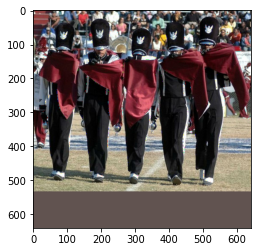

In [86]:
plt.imshow(im.astype(np.uint8))
plt.show()

In [65]:
###############################################################################
#   Visulization                                                              #
###############################################################################
def draw_bbox(img, ann, img_height, img_width):
    """draw bboxes and landmarks"""
    # bbox
    x1, y1, x2, y2 = int(ann[0] * img_width), int(ann[1] * img_height), \
                     int(ann[2] * img_width), int(ann[3] * img_height)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # confidence
    text = "{:.4f}".format(ann[5])
    cv2.putText(img, text, (int(ann[0] * img_width), int(ann[1] * img_height)),
                cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))



def draw_anchor(img, prior, img_height, img_width):
    """draw anchors"""
    x1 = int(prior[0] * img_width - prior[2] * img_width / 2)
    y1 = int(prior[1] * img_height - prior[3] * img_height / 2)
    x2 = int(prior[0] * img_width + prior[2] * img_width / 2)
    y2 = int(prior[1] * img_height + prior[3] * img_height / 2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 1)

In [88]:
for o in out:
  draw_bbox(im, o, 640, 640)

In [53]:
# for s in out:
#     x,y,w,h = s[:4]
#     cv2.rectangle(im, (int(x), int(y)),(int(x+w), int(y+h)), (0,255,0), 4)

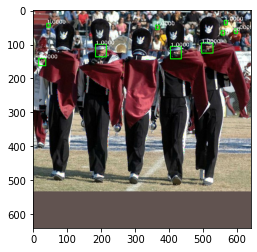

In [89]:
plt.imshow(im.astype(np.uint8))
plt.show()

# understanding output - testing with training sample 1

In [ ]:
samples[0][0]

'./data/widerface/train/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_238.jpg'

In [ ]:
len(samples[0][1]), len(samples[0][1][0])

(24, 20)

(1, 704, 1024, 3)


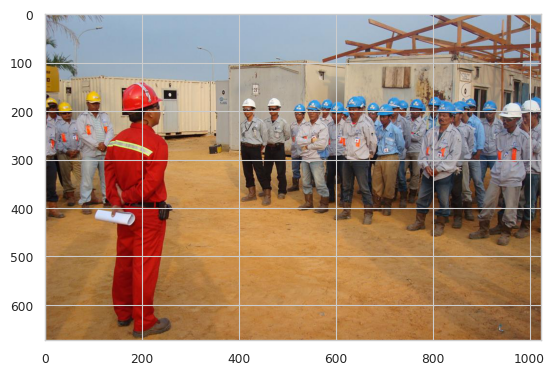

In [ ]:
img_raw = plt.imread(samples[0][0])
print(img.shape)

plt.imshow(img_raw)
plt.show()

In [ ]:
# for prior_index in range(len(outputs)):
#     draw_bbox_landm(img_raw, outputs[prior_index], img_height_raw,
#                     img_width_raw)
#     cv2.imwrite(save_img_path, img_raw)
# print(f"[*] save result at {save_img_path}")

In [ ]:
img_height_raw, img_width_raw, _ = img_raw.shape

img_height_raw, img_width_raw

(674, 1024)

In [ ]:
img = np.float32(img_raw.copy())
img.shape

(674, 1024, 3)

In [ ]:
# pad input image to avoid unmatched shape problem
img, pad_params = pad_input_image(img, max_steps=max(cfg['steps']))

print(img.shape)
print(pad_params)

(704, 1024, 3)
(674, 1024, 30, 0)


In [ ]:
model = RetinaFaceModel_inference(cfg)

In [ ]:
img = img[np.newaxis, ...]
img.shape

(1, 704, 1024, 3)

In [ ]:
output_train = model(img)
output_train

(<tf.Tensor: shape=(1, 29568, 4), dtype=float32, numpy=
 array([[[ 0.10016418, -1.9901662 ,  4.1877656 , -3.025934  ],
         [-5.8004293 ,  1.3003535 , -1.4696491 ,  2.6561065 ],
         [-5.505143  , -0.0424509 ,  4.844856  , -8.488812  ],
         ...,
         [ 4.2463226 , -1.4841944 , -1.9450378 ,  1.3144317 ],
         [-1.6650295 , -1.2518569 , -1.2962104 , -0.18107265],
         [-2.9405317 , -2.1769915 , -1.7766606 ,  1.509661  ]]],
       dtype=float32)>, <tf.Tensor: shape=(1, 29568, 10), dtype=float32, numpy=
 array([[[-6.3911157e+00,  2.6039462e+00, -1.1230930e+00, ...,
           3.4308524e+00,  7.1385484e+00,  1.4742937e+00],
         [-7.0370684e+00,  2.2298584e+00,  1.8664912e+00, ...,
          -1.8223360e+00,  6.8287234e+00,  1.2311596e+01],
         [-9.8337526e+00, -4.2222037e+00, -2.1659775e+00, ...,
           7.0335836e+00,  9.0825138e+00,  1.2473756e+00],
         ...,
         [-3.0665860e+00,  3.3048052e-01,  4.3373332e+00, ...,
          -1.1403441e-02, -

In [ ]:
#bboxes
output_train[0][0]

<tf.Tensor: shape=(29568, 4), dtype=float32, numpy=
array([[ 0.10016418, -1.9901662 ,  4.1877656 , -3.025934  ],
       [-5.8004293 ,  1.3003535 , -1.4696491 ,  2.6561065 ],
       [-5.505143  , -0.0424509 ,  4.844856  , -8.488812  ],
       ...,
       [ 4.2463226 , -1.4841944 , -1.9450378 ,  1.3144317 ],
       [-1.6650295 , -1.2518569 , -1.2962104 , -0.18107265],
       [-2.9405317 , -2.1769915 , -1.7766606 ,  1.509661  ]],
      dtype=float32)>

In [ ]:
#landms
output_train[1][0]

<tf.Tensor: shape=(29568, 10), dtype=float32, numpy=
array([[-6.3911157e+00,  2.6039462e+00, -1.1230930e+00, ...,
         3.4308524e+00,  7.1385484e+00,  1.4742937e+00],
       [-7.0370684e+00,  2.2298584e+00,  1.8664912e+00, ...,
        -1.8223360e+00,  6.8287234e+00,  1.2311596e+01],
       [-9.8337526e+00, -4.2222037e+00, -2.1659775e+00, ...,
         7.0335836e+00,  9.0825138e+00,  1.2473756e+00],
       ...,
       [-3.0665860e+00,  3.3048052e-01,  4.3373332e+00, ...,
        -1.1403441e-02, -7.0413542e-01, -2.1923795e+00],
       [-1.7313776e+00, -3.2676301e+00, -2.1151276e+00, ...,
         3.1138873e-01,  1.4347540e+00, -2.6395965e-01],
       [-8.9946097e-01, -5.3160667e-02,  6.3223357e+00, ...,
        -2.3949676e+00, -2.8405988e+00, -6.3147569e-01]], dtype=float32)>

In [ ]:
#classifications
print(output_train[2][0, :, 0])
print()
print(output_train[2][0, :, 0][..., tf.newaxis])
print('*'*50)
print(tf.ones_like(output_train[2][0, :, 0][..., tf.newaxis]))

tf.Tensor([0.99998    0.33453968 0.9999584  ... 0.9648103  0.3611817  0.21247272], shape=(29568,), dtype=float32)

tf.Tensor(
[[0.99998   ]
 [0.33453968]
 [0.9999584 ]
 ...
 [0.9648103 ]
 [0.3611817 ]
 [0.21247272]], shape=(29568, 1), dtype=float32)
**************************************************
tf.Tensor(
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]], shape=(29568, 1), dtype=float32)


In [ ]:
#preds
preds = tf.concat(
    [output_train[0][0],
    output_train[1][0],
    tf.ones_like(output_train[2][0, :, 0][..., tf.newaxis]),
    output_train[2][0, :, 1][..., tf.newaxis]],
    axis = 1
)

preds.shape

TensorShape([29568, 16])

In [ ]:
# tf.shape(inputs)[1] = 640

In [ ]:
cfg

In [ ]:
priors = prior_box_tf((704, 1024),
                      cfg['min_sizes'],  cfg['steps'], cfg['clip'])

type(priors)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
priors

<tf.Tensor: shape=(29568, 4), dtype=float32, numpy=
array([[0.00390625, 0.00568182, 0.015625  , 0.02272727],
       [0.00390625, 0.00568182, 0.03125   , 0.04545455],
       [0.01171875, 0.00568182, 0.015625  , 0.02272727],
       ...,
       [0.953125  , 0.97727275, 0.5       , 0.72727275],
       [0.984375  , 0.97727275, 0.25      , 0.36363637],
       [0.984375  , 0.97727275, 0.5       , 0.72727275]], dtype=float32)>

In [ ]:
decode_preds = decode_tf(preds, priors, cfg['variances'])

type(decode_preds)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
decode_preds

<tf.Tensor: shape=(29568, 16), dtype=float32, numpy=
array([[-1.3989635e-02, -5.0455187e-03,  2.2115149e-02, ...,
         9.0324860e-03,  1.0000000e+00,  2.0022804e-05],
       [-2.5865855e-02, -2.7066769e-02, -2.5743302e-03, ...,
         6.1643615e-02,  1.0000000e+00,  6.6546035e-01],
       [-1.7470786e-02,  3.5047396e-03,  2.3704713e-02, ...,
         8.5167633e-03,  1.0000000e+00,  4.1603522e-05],
       ...,
       [ 9.9600887e-01,  3.9635721e-01,  1.3348734e+00, ...,
         8.1782699e-01,  1.0000000e+00,  3.5189621e-02],
       [ 8.4629476e-01,  7.5639915e-01,  1.0392038e+00, ...,
         9.6767420e-01,  1.0000000e+00,  6.3881832e-01],
       [ 6.6211325e-01,  3.2713899e-01,  1.0125835e+00, ...,
         9.3134725e-01,  1.0000000e+00,  7.8752726e-01]], dtype=float32)>

In [ ]:
tf.shape(decode_preds)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=29568>

In [ ]:
iou_th, score_th

(0.4, 0.5)

In [ ]:
selected_indices = tf.image.non_max_suppression(
        boxes = decode_preds[:, :4],
        scores = decode_preds[:, -1],
        max_output_size = 24,           #tf.shape(decode_preds)[0],
        iou_threshold = iou_th,
        score_threshold = score_th)

In [ ]:
selected_indices

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([  495,  6953,  9503,  9759, 10015, 11557, 14237, 19233, 20257,
       22743, 22777, 22781, 22873, 22999, 23685, 23945, 23947, 23963,
       23965, 24067, 24069, 24071, 24091, 24093], dtype=int32)>

In [ ]:
out = tf.gather(decode_preds, selected_indices)
out

<tf.Tensor: shape=(24, 16), dtype=float32, numpy=
array([[ 0.89800334, -0.00840998,  0.9227171 ,  0.09082662,  0.932667  ,
         0.03386407,  0.9301639 , -0.02056043,  0.8877979 ,  0.0629354 ,
         0.93920255,  0.01137129,  1.0076652 ,  0.06613667,  1.        ,
         1.        ],
       [ 0.11894345,  0.29989377,  0.15490752,  0.31328323,  0.12295058,
         0.31169504,  0.13849854,  0.30205894,  0.10506275,  0.33806354,
         0.15314552,  0.31153578,  0.2210199 ,  0.3401231 ,  1.        ,
         1.        ],
       [ 0.09564274,  0.40376818,  0.11170238,  0.453062  ,  0.13588656,
         0.4538326 ,  0.09956563,  0.40584233,  0.0545911 ,  0.49203068,
         0.10280804,  0.42492   ,  0.18749815,  0.441496  ,  1.        ,
         1.        ],
       [ 0.09296496,  0.42250964,  0.11663948,  0.4355586 ,  0.14961445,
         0.46666637,  0.130106  ,  0.4280125 ,  0.05248338,  0.48289022,
         0.11842953,  0.4520342 ,  0.21816695,  0.4600632 ,  1.        ,
        

In [ ]:
out = out.numpy()

In [ ]:
def recover_pad_output(outputs, pad_params):
    """recover the padded output effect"""
    img_h, img_w, img_pad_h, img_pad_w = pad_params
    recover_xy = np.reshape(outputs[:, :14], [-1, 7, 2]) * \
        [(img_pad_w + img_w) / img_w, (img_pad_h + img_h) / img_h]
    outputs[:, :14] = np.reshape(recover_xy, [-1, 14])

    return outputs

In [ ]:
pad_params

(674, 1024, 30, 0)

In [ ]:
outputs = recover_pad_output(out, pad_params)

In [ ]:
outputs.shape

(24, 16)

In [ ]:
len(outputs)

3736

In [ ]:
for prior_index in range(len(outputs)):
        draw_bbox_landm(img_raw, outputs[prior_index], img_height_raw,
                        img_width_raw)

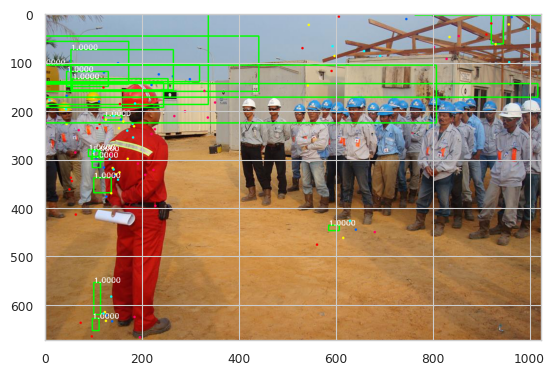

In [ ]:
plt.imshow(img_raw)

# experimenting outputs

In [ ]:
xtemp1 = xtemp.numpy()[0,:,:,:]
xtemp1.shape

(640, 640, 3)

In [ ]:
img_path = '/content/1613848099513.jpg'

In [ ]:
img_raw = cv2.imread('/content/1613848099513.jpg')
img_height_raw, img_width_raw, _ = img_raw.shape
img = np.float32(img_raw.copy())

print(img_height_raw)
print(img_width_raw)

1918
1844


In [ ]:
img = cv2.resize(img, (0, 0), fx=1,
                            fy=1,
                            interpolation=cv2.INTER_LINEAR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(1918, 1844, 3)

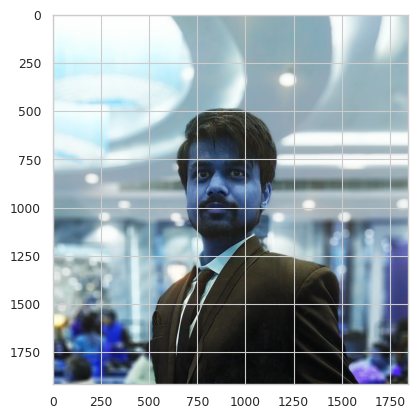

In [ ]:
plt.imshow(img_raw)
plt.show()

In [ ]:
img, pad_params = pad_input_image(img, max_steps=max(cfg['steps']))

In [ ]:
img.shape

(640, 640, 3)

In [ ]:
pad_params

(640, 640, 0, 0)

In [ ]:
outputs = model(img[np.newaxis, ...]).numpy()

In [ ]:
outputs.shape

(7488, 16)

In [ ]:
outputs = recover_pad_output(outputs, pad_params)

In [ ]:
outputs.shape

(7488, 16)

In [ ]:
len(outputs)

7488

In [ ]:
# draw and save results
save_img_path = os.path.join('out_' + os.path.basename(img_path))
for prior_index in range(len(outputs)):
    draw_bbox_landm(img_raw, outputs[prior_index], img_height_raw,
                    img_width_raw)
    cv2.imwrite(save_img_path, img_raw)
print(f"[*] save result at {save_img_path}")

[*] save result at out_1613848099513.jpg


In [ ]:
save_img_path

In [ ]:
out = plt.imread(save_img_path)
out.shape

In [ ]:
plt.imshow(out)
plt.show()

In [ ]:
xtemp1

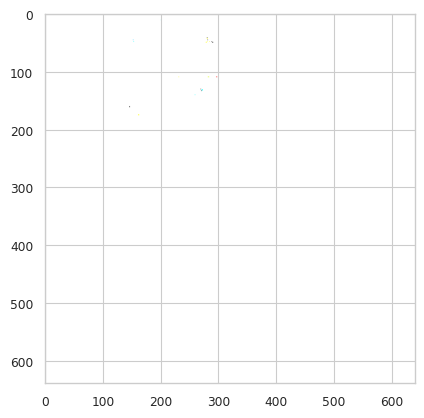

In [ ]:
plt.imshow(xtemp1)
plt.show()

In [ ]:
ypred_temp1 = model(xtemp)
ypred_temp1

(<tf.Tensor: shape=(1, 16800, 4), dtype=float32, numpy=
 array([[[ 0.35473648,  0.13475156,  3.7759504 ,  6.856581  ],
         [-1.531177  ,  0.48871338, -2.081355  , -0.12608624],
         [ 3.5543811 , -4.8035517 ,  6.689021  ,  7.8595057 ],
         ...,
         [-3.0992239 ,  1.319152  ,  2.2535667 ,  1.4098037 ],
         [-0.70297134, -3.591864  ,  0.22981703, -0.15286635],
         [-2.8850117 ,  3.7312758 ,  2.0049443 ,  0.9901669 ]]],
       dtype=float32)>, <tf.Tensor: shape=(1, 16800, 10), dtype=float32, numpy=
 array([[[-1.3899478 , -4.0483303 , -3.9506795 , ..., -0.06935198,
          -1.0926036 , -0.50610954],
         [ 1.4040815 , -0.27496356,  1.8950644 , ..., -0.70333517,
           2.2094898 , -1.42324   ],
         [ 1.691037  , -4.472405  , -1.4335517 , ..., -1.655506  ,
          -3.3709562 ,  4.684601  ],
         ...,
         [ 0.31487387, -0.2155874 , -3.7514577 , ..., -1.291543  ,
           2.559754  , -0.7800139 ],
         [ 0.78551584,  1.4627323 ,  2.5

In [ ]:
type(ypred_temp1)

tuple

In [ ]:
ypred_temp = list(ypred_temp1)
len(ypred_temp)

3

In [ ]:
ypred_temp[0].shape, ypred_temp[1].shape, ypred_temp[2].shape

(TensorShape([1, 16800, 4]),
 TensorShape([1, 16800, 10]),
 TensorShape([1, 16800, 2]))

In [ ]:
# define losses function
multi_box_loss = MultiBoxLoss()

multi_box_loss(ytemp, ypred_temp)

(<tf.Tensor: shape=(), dtype=float32, numpy=4.817335>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.3045397>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.088662>)

## test widerface.py

In [ ]:
# flags.DEFINE_string('cfg_path', './configs/retinaface_res50.yaml',
#                     'config file path')
# flags.DEFINE_string('gpu', '0', 'which gpu to use')
# flags.DEFINE_string('save_folder', './widerface_evaluate/widerface_txt/',
#                     'folder path to save evaluate results')
# flags.DEFINE_boolean('origin_size', True,
#                      'whether use origin image size to evaluate')
# flags.DEFINE_boolean('save_image', True, 'whether save evaluation images')
# flags.DEFINE_float('iou_th', 0.4, 'iou threshold for nms')
# flags.DEFINE_float('score_th', 0.02, 'score threshold for nms')
# flags.DEFINE_float('vis_th', 0.5, 'threshold for visualization')

In [ ]:
!mkdirwiderface_evaluate

In [ ]:
save_folder = '/content/widerface_evaluate'
origin_size = True
save_image = True
iou_th = .4
score_th = .02
vis_th = .5

In [ ]:
import pathlib

def load_info(txt_path):
    """load info from txt"""
    img_paths = []
    words = []

    f = open(txt_path, 'r')
    lines = f.readlines()
    isFirst = True
    labels = []
    for line in lines:
        line = line.rstrip()
        if line.startswith('#'):
            if isFirst is True:
                isFirst = False
            else:
                labels_copy = labels.copy()
                words.append(labels_copy)
                labels.clear()
            path = line[2:]
            path = txt_path.replace('label.txt', 'images/') + path
            img_paths.append(path)
        else:
            line = line.split(' ')
            label = [float(x) for x in line]
            labels.append(label)

    words.append(labels)
    return img_paths, words




logger = tf.get_logger()
logger.disabled = True
logger.setLevel(logging.FATAL)
set_memory_growth()

#cfg = load_yaml(cfg_path)

# define network
model = RetinaFaceModel(cfg, training=False, iou_th=iou_th,
                        score_th=score_th)

# load checkpoint
checkpoint_dir = './checkpoints/' + cfg['sub_name']
checkpoint = tf.train.Checkpoint(model=model)
if tf.train.latest_checkpoint(checkpoint_dir):
    checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    print("[*] load ckpt from {}.".format(
        tf.train.latest_checkpoint(checkpoint_dir)))
else:
    print("[*] Cannot find ckpt from {}.".format(checkpoint_dir))
    exit()

# evaluation on testing dataset
testset_folder = cfg['testing_dataset_path']
testset_list = os.path.join(testset_folder, 'label.txt')

img_paths, _ = load_info(testset_list)
for img_index, img_path in enumerate(img_paths):
    print(" [{} / {}] det {}".format(img_index + 1, len(img_paths),
                                        img_path))
    img_raw = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_height_raw, img_width_raw, _ = img_raw.shape
    img = np.float32(img_raw.copy())

    # testing scale
    target_size = 1600
    max_size = 2150
    img_shape = img.shape
    img_size_min = np.min(img_shape[0:2])
    img_size_max = np.max(img_shape[0:2])
    resize = float(target_size) / float(img_size_min)
    
    # prevent bigger axis from being more than max_size:
    if np.round(resize * img_size_max) > max_size:
        resize = float(max_size) / float(img_size_max)
    if origin_size:
        if os.path.basename(img_path) == '6_Funeral_Funeral_6_618.jpg':
            resize = 0.5 # this image is too big to avoid OOM problem
        else:
            resize = 1

    img = cv2.resize(img, None, None, fx=resize, fy=resize,
                        interpolation=cv2.INTER_LINEAR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # pad input image to avoid unmatched shape problem
    img, pad_params = pad_input_image(img, max_steps=max(cfg['steps']))

    # run model
    outputs = model(img[np.newaxis, ...]).numpy()

    # recover padding effect
    outputs = recover_pad_output(outputs, pad_params)

    # write results
    img_name = os.path.basename(img_path)
    sub_dir = os.path.basename(os.path.dirname(img_path))
    save_name = os.path.join(
        save_folder, sub_dir, img_name.replace('.jpg', '.txt'))

    pathlib.Path(os.path.join(save_folder, sub_dir)).mkdir(
        parents=True, exist_ok=True)

    with open(save_name, "w") as file:
        bboxs = outputs[:, :4]
        confs = outputs[:, -1]

        file_name = img_name + "\n"
        bboxs_num = str(len(bboxs)) + "\n"
        file.write(file_name)
        file.write(bboxs_num)
        for box, conf in zip(bboxs, confs):
            x = int(box[0] * img_width_raw)
            y = int(box[1] * img_height_raw)
            w = int(box[2] * img_width_raw) - int(box[0] * img_width_raw)
            h = int(box[3] * img_height_raw) - int(box[1] * img_height_raw)
            confidence = str(conf)
            line = str(x) + " " + str(y) + " " + str(w) + " " + str(h) \
                + " " + confidence + " \n"
            file.write(line)

    # save images
    pathlib.Path(os.path.join(
        './results', cfg['sub_name'], sub_dir)).mkdir(
            parents=True, exist_ok=True)
    if save_image:
        for prior_index in range(len(outputs)):
            if outputs[prior_index][15] >= vis_th:
                draw_bbox_landm(img_raw, outputs[prior_index],
                                img_height_raw, img_width_raw)
        cv2.imwrite(os.path.join('./results', cfg['sub_name'], sub_dir,
                                    img_name), img_raw)

## test.py

In [ ]:


# flags.DEFINE_string('cfg_path', './configs/retinaface_res50.yaml',
#                     'config file path')
# flags.DEFINE_string('gpu', '0', 'which gpu to use')
# flags.DEFINE_string('img_path', '', 'path to input image')
# flags.DEFINE_boolean('webcam', False, 'get image source from webcam or not')
# flags.DEFINE_float('iou_th', 0.4, 'iou threshold for nms')
# flags.DEFINE_float('score_th', 0.5, 'score threshold for nms')
# flags.DEFINE_float('down_scale_factor', 1.0, 'down-scale factor for inputs')



In [ ]:
img_path = '/content/0_Parade_marchingband_1_149.jpg'
iou_th = 0.4
score_th = 0.5
down_scale_factor = 1.0

In [ ]:
logger = tf.get_logger()
logger.disabled = True
logger.setLevel(logging.FATAL)
set_memory_growth()

cfg = load_yaml(FLAGS.cfg_path)

# define network
model = RetinaFaceModel(cfg, training=False, iou_th=FLAGS.iou_th,
                        score_th=FLAGS.score_th)

# load checkpoint
checkpoint_dir = './checkpoints/' + cfg['sub_name']
checkpoint = tf.train.Checkpoint(model=model)
if tf.train.latest_checkpoint(checkpoint_dir):
    checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    print("[*] load ckpt from {}.".format(
        tf.train.latest_checkpoint(checkpoint_dir)))
else:
    print("[*] Cannot find ckpt from {}.".format(checkpoint_dir))
    exit()

if not FLAGS.webcam:
    if not os.path.exists(FLAGS.img_path):
        print(f"cannot find image path from {FLAGS.img_path}")
        exit()

    print("[*] Processing on single image {}".format(FLAGS.img_path))

    img_raw = cv2.imread(FLAGS.img_path)
    img_height_raw, img_width_raw, _ = img_raw.shape
    img = np.float32(img_raw.copy())

    if FLAGS.down_scale_factor < 1.0:
        img = cv2.resize(img, (0, 0), fx=FLAGS.down_scale_factor,
                            fy=FLAGS.down_scale_factor,
                            interpolation=cv2.INTER_LINEAR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # pad input image to avoid unmatched shape problem
    img, pad_params = pad_input_image(img, max_steps=max(cfg['steps']))

    # run model
    outputs = model(img[np.newaxis, ...]).numpy()

    # recover padding effect
    outputs = recover_pad_output(outputs, pad_params)

    # draw and save results
    save_img_path = os.path.join('out_' + os.path.basename(FLAGS.img_path))
    for prior_index in range(len(outputs)):
        draw_bbox_landm(img_raw, outputs[prior_index], img_height_raw,
                        img_width_raw)
        cv2.imwrite(save_img_path, img_raw)
    print(f"[*] save result at {save_img_path}")

else:
    cam = cv2.VideoCapture(0)

    start_time = time.time()
    while True:
        _, frame = cam.read()
        if frame is None:
            print("no cam input")

        frame_height, frame_width, _ = frame.shape
        img = np.float32(frame.copy())
        if FLAGS.down_scale_factor < 1.0:
            img = cv2.resize(img, (0, 0), fx=FLAGS.down_scale_factor,
                                fy=FLAGS.down_scale_factor,
                                interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # pad input image to avoid unmatched shape problem
        img, pad_params = pad_input_image(img, max_steps=max(cfg['steps']))

        # run model
        outputs = model(img[np.newaxis, ...]).numpy()

        # recover padding effect
        outputs = recover_pad_output(outputs, pad_params)

        # draw results
        for prior_index in range(len(outputs)):
            draw_bbox_landm(frame, outputs[prior_index], frame_height,
                            frame_width)

        # calculate fps
        fps_str = "FPS: %.2f" % (1 / (time.time() - start_time))
        start_time = time.time()
        cv2.putText(frame, fps_str, (25, 25),
                    cv2.FONT_HERSHEY_DUPLEX, 0.75, (0, 255, 0), 2)

        # show frame
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            exit()


# END